# Basics

In this workbook we'll try to walk through some basics of the linear regression models shown in the tutorial.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [58]:
workbook_data = pickle.load(open('data/workbook_0.p', 'rb'))
x, y, ye = workbook_data['x'], workbook_data['y'], workbook_data['ye']

In [59]:
x.shape,y.shape,ye.shape

((200,), (200,), (200,))

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'Fake Data')]

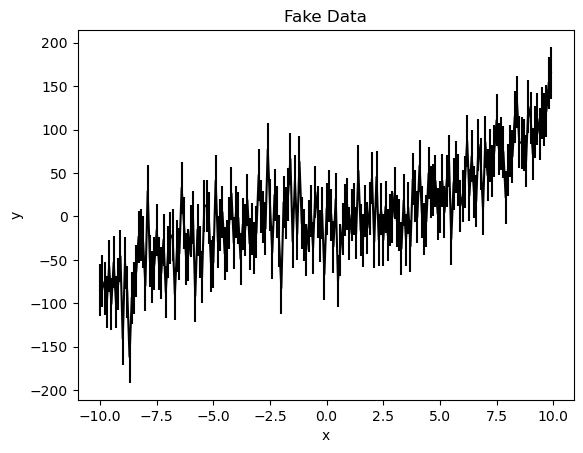

In [60]:
fig, ax = plt.subplots()
ax.errorbar(x, y, ye, color='k')
ax.set(xlabel='x', ylabel='y', title='Fake Data')

## Step 1: Create a design matrix

Create a design matrix for the data above. The design matrix should be a **3rd order polynomial**. The order of the vectors in the design matrix should be $x^0$, $x^1$, ... , $x^n$.

Overwrite `A` below to be your design matrix.

In [61]:
A = np.vstack([x**idx for idx in range(4)]).T

In [62]:
A.shape

(200, 4)

In [63]:
assert isinstance(A, np.ndarray)
assert np.all([np.allclose(a, x**idx) for idx, a in enumerate(A.T)])

## Step 2: Find the best fitting weights
Use the Weighted Least Squares equation to find the mean best fitting weights. 

Overwrite `w` below to be your mean best fitting weights. 

In [64]:
w = np.linalg.solve(A.T.dot(A), A.T.dot(y))

In [65]:
assert np.isclose(w, workbook_data['true_w'], atol=3*np.linalg.inv(A.T.dot(A/ye[:, None]**2)).diagonal()**0.5).all()

In [66]:
w

array([-3.73104291,  1.18083495,  0.23563164,  0.10823626])

## Step 3: Find the errors on the best fitting weights

Calculate the errors on the best fitting weights (i.e. the standard deviation of the distribution of the best fitting weights.)

Overwrite `w_err` below with your best fitting weights 

In [79]:
sigma_w_inv = A.T.dot(A/ye[:, None]**2)

w_err = np.linalg.inv(sigma_w_inv).diagonal()**0.5

w_err

array([3.18224571, 0.91858162, 0.07118683, 0.01403367])

In [80]:
assert len(w_err) == len(w)
assert np.allclose(w_err, np.asarray([3.18224571, 0.91858162, 0.07118683, 0.01403367]), atol=0.3)

## Step 4: Calculate the model outside of the data bounds

Use your best fitting weights to calculate the mean model at position $x = 11$.

Overwrite `y_11` below with your answer. 

In [81]:
x_11 = 11

y_11 = w @ [x_11**idx for idx in range(4)]

y_11

181.83203225825372

In [82]:
assert np.isclose(y_11, 181.83203225825352,atol=0.05)

## Step 5: Estimate the error on the model at new point

Use `np.random.multivariate_normal` to estimate the model error at  $x = 11$.

Overwrite `y_11_err` below with your answer.

12.321672224923402

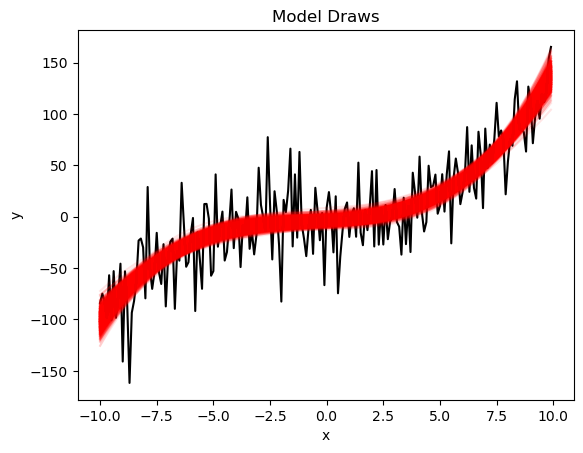

In [100]:
weight_samples = np.random.multivariate_normal(w, np.linalg.inv(sigma_w_inv), size=1000)
y_11_err = np.std(weight_samples @ [x_11**idx for idx in range(4)])

fig, ax = plt.subplots()
ax.plot(x,y,color='k')
ax.plot(x,A.dot(weight_samples.T), alpha=0.1, color='r');
ax.set(xlabel='x', ylabel='y', title='Model Draws');

y_11_err

In [93]:
assert np.isclose(y_11_err, 12, atol=2)